In [ ]:
!pip install -q keras

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
train_path='/content/drive/My Drive/Training'
test_path='/content/drive/My Drive/Testing'


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Training = train_datagen.flow_from_directory('/content/drive/My Drive/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Validation = test_datagen.flow_from_directory('/content/drive/My Drive/Testing',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2169 images belonging to 4 classes.
Found 729 images belonging to 4 classes.


In [ ]:
name_of_classes =['Apple Red 2','Banana L','Lemon','Walnut']
no_of_classes = 4


from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (5, 5), input_shape = (100, 100, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides= 2))


classifier.add(Conv2D(64, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides= 2))


classifier.add(Conv2D(128, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides= 2))


classifier.add(Conv2D(256, (5, 5), activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides= 2))


classifier.add(Flatten())


classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = no_of_classes, activation = 'softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

history = classifier.fit_generator(Training,
                         steps_per_epoch = 32,
                         epochs =10,
                         validation_data = Validation,
                         validation_steps = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





32/32 [==============================] - 715s 22s/step - loss: 1.3790 - acc: 0.3330 - val_loss: 0.8841 - val_acc: 0.4287
Epoch 2/10
32/32 [==============================] - 332s 10s/step - loss: 0.6903 - acc: 0.6567 - val_loss: 0.3454 - val_acc: 0.7945
Epoch 3/10
32/32 [==============================] - 97s 3s/step - loss: 0.1758 - acc: 0.9259 - val_loss: 0.0398 - val_acc: 0.9733
Epoch 4/10
32/32 [==============================] - 47s 1s/step - loss: 0.1790 - acc: 0.9629 - val_loss: 0.2963 - val_acc: 0.8584
Epoch 5/10
32/32 [==============================] - 47s 1s/step - loss: 0.1704 - acc: 0.9346 - val_loss: 0.0795 - val_acc: 0.9617
Epoch 6/10
32/32 [==============================] - 47s 1s/step - loss: 0.0407 - acc: 0.9932 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 7/10
32/32 [==============================] - 47s 1s/step - loss: 0.0113 - acc: 0.9990 - val_loss: 0.0019 - 

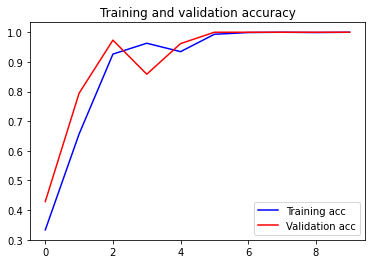

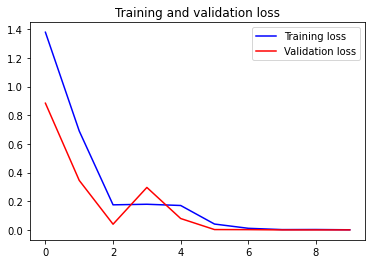

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

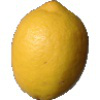

In [ ]:
test_image = image.load_img('/content/drive/My Drive/Testing/Lemon/321_100.jpg', target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result=classifier.predict(test_image)
Training.class_indices
img='/content/drive/My Drive/Testing/Lemon/321_100.jpg'
Image.open(img)

Predicted: Lemon


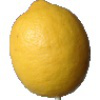

In [ ]:

for i in range(no_of_classes):
    if (result[0][i] == 1.0):
        img_path = '/content/drive/My Drive/Training/'+name_of_classes[i]+'/100_100.jpg' 
        print ('Predicted:',name_of_classes[i])
Image.open(img_path)



In [ ]:
classifier.evaluate(Validation)

23/23 [==============================] - 8s 328ms/step


[0.00018205762379018678, 1.0]